In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from math import sin, cos, sqrt, atan2, radians

import query_helper
import json

# Start by loading db into pandas


In [4]:
df = query_helper.query_to_df('''SELECT * FROM climbs.routes''')
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,"South Dakota,Custer State Park,Sylvan Lake,Syl...",https://www.mountainproject.com/route/10571472...,-103.564,43.8463
1,105714728,Waves,Sport,5.8,4.6,217,2,"South Dakota,The Needles Of Rushmore,Mount Rus...",https://www.mountainproject.com/route/10571472...,-103.466,43.8865
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,"South Dakota,Custer State Park,Cathedral Spire...",https://www.mountainproject.com/route/10571473...,-103.534,43.8488
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,"South Dakota,Custer State Park,Sylvan Lake,Out...",https://www.mountainproject.com/route/10571473...,-103.568,43.8487
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,"South Dakota,The Needles Of Rushmore,Mount Rus...",https://www.mountainproject.com/route/10571473...,-103.469,43.8870


In [5]:
df[df['id']==106875741]

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
23121,106875741,Via Leni 6b,"Sport, Alpine",5.10b,5.0,4,6,"International,Europe,Switzerland,Albigna Valle...",https://www.mountainproject.com/route/10687574...,9.6383,46.3387


In [6]:
df.tail()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
77529,119462748,Thin Air,Trad,5.8+,4.0,3,1,"Maine,a. Western Mountains,Tumble Down Dick Mt...",https://www.mountainproject.com/route/11946274...,-70.9401,44.4064
77530,119462865,No Mistake,Trad,5.11b,3.5,2,1,"Maine,a. Western Mountains,Tumble Down Dick Mt...",https://www.mountainproject.com/route/11946286...,-70.9401,44.4064
77531,119462924,The Red Letter,Trad,5.7,3.3,3,1,"Maine,a. Western Mountains,Tumble Down Dick Mt...",https://www.mountainproject.com/route/11946292...,-70.9406,44.4054
77532,119512572,BroZone,Trad,5.14a R,5.0,1,1,"New York,The Gunks,The Trapps,The Arrow Wall -...",https://www.mountainproject.com/route/11951257...,-74.1796,41.7440
77533,119512657,Ozone,Trad,5.14a R,5.0,1,1,"New York,The Gunks,The Trapps,The Arrow Wall -...",https://www.mountainproject.com/route/11951265...,-74.1796,41.7440


In [7]:
df.shape

(77534, 11)

# Initial Data  Cleaning

### Add sub location cols

In [8]:
df['location']=df['location'].apply(lambda x: x.split(','))

In [9]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,url,longitude,latitude
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,"[South Dakota, Custer State Park, Sylvan Lake,...",https://www.mountainproject.com/route/10571472...,-103.564,43.8463
1,105714728,Waves,Sport,5.8,4.6,217,2,"[South Dakota, The Needles Of Rushmore, Mount ...",https://www.mountainproject.com/route/10571472...,-103.466,43.8865
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,"[South Dakota, Custer State Park, Cathedral Sp...",https://www.mountainproject.com/route/10571473...,-103.534,43.8488
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,"[South Dakota, Custer State Park, Sylvan Lake,...",https://www.mountainproject.com/route/10571473...,-103.568,43.8487
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,"[South Dakota, The Needles Of Rushmore, Mount ...",https://www.mountainproject.com/route/10571473...,-103.469,43.8870


In [10]:
df['region'] =0
df['area']=0
df['sub_area']=0
df['wall']=0

In [11]:
#determines length of sub location list and splits them into appropriate columns
def split_list(array, length):
    if length ==5:
        if len(array)>=5:
            return ','.join(array[4:])
        else:
            return 0
    if len(array)>= length:
        return array[length-1]
    else:
        return 0
        

In [12]:
#parse area info (note size varies and we only split into 5 sections)
df.region =df.location.apply(lambda x: split_list(x,2))
df.area =df.location.apply(lambda x: split_list(x,3))
df.sub_area =df.location.apply(lambda x:  split_list(x,4))
df.wall =df.location.apply(lambda x:  split_list(x,5))

#then make location state only
df.location = df.location.apply(lambda x: x[0])

In [13]:
#reorder df for readability
df = df[['id',
'name',
'type',
'rating',
'stars',
'starVotes',
'pitches',
'location',
'region',
'area',
'sub_area',
'wall',
'longitude',
'latitude',
'url',
]]
df.head(20)

,id,name,type,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/10571472...
1,105714728,Waves,Sport,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/10571472...
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/10571473...
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/10571473...
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/10571473...
5,105714740,Solitaire,Sport,5.7,4.1,120,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/10571474...
6,105714743,Star Dancer,"Sport, TR",5.8,4.4,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8828,https://www.mountainproject.com/route/10571474...
7,105714746,Solo System,"Sport, TR",5.6,3.0,70,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8828,https://www.mountainproject.com/route/10571474...
8,105714749,Weird Water,Trad,5.7,4.8,89,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,"Marker,Middle Marker Area",-103.462,43.8824,https://www.mountainproject.com/route/10571474...
9,105714752,Patience,Sport,5.8 X,3.9,16,1,South Dakota,Custer State Park,Tenpins/Switchbacks,Pawn,0,-103.536,43.8394,https://www.mountainproject.com/route/10571475...


### Breakout Climbing type

In [14]:
df.type.value_counts()

Boulder                           24416
Sport                             24148
Trad                              15900
Trad, TR                           2829
TR                                 2349
                                  ...  
TR, Ice, Alpine                       1
Sport, TR, Mixed, Ice                 1
Trad, Aid, Mixed, Alpine              1
Trad, Boulder, Ice, Snow, Alpi        1
TR, Mixed, Ice, Snow                  1
Name: type, Length: 100, dtype: int64

In [15]:
df.isna().sum()

id           0
name         0
type         0
rating       0
stars        0
starVotes    0
pitches      0
location     0
region       0
area         0
sub_area     0
wall         0
longitude    0
latitude     0
url          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77534 entries, 0 to 77533
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         77534 non-null  int64  
 1   name       77534 non-null  object 
 2   type       77534 non-null  object 
 3   rating     77534 non-null  object 
 4   stars      77534 non-null  float64
 5   starVotes  77534 non-null  int64  
 6   pitches    77534 non-null  int64  
 7   location   77534 non-null  object 
 8   region     77534 non-null  object 
 9   area       77534 non-null  object 
 10  sub_area   77534 non-null  object 
 11  wall       77534 non-null  object 
 12  longitude  77534 non-null  float64
 13  latitude   77534 non-null  float64
 14  url        77534 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 8.9+ MB


In [17]:
#fill in blank types as trad (theres only a few)
df.type = df.type.apply(lambda x: 'Trad' if x=='' else x)

In [18]:
df['Sport'] =0
df['Trad']=0
df['Boulder']=0
df['TR']=0
df['Alpine'] =0
df['Aid']=0
df['Ice']=0
df['Snow'] =0
df['Mixed']=0

In [19]:
df['Sport'] =df['type'].apply(lambda x: 1 if 'Sport' in x else 0)
df['Trad']=df['type'].apply(lambda x: 1 if 'Trad' in x else 0)
df['Boulder']=df['type'].apply(lambda x: 1 if 'Boulder' in x else 0)
df['TR']=df['type'].apply(lambda x: 1 if 'TR' in x else 0)
df['Alpine'] =df['type'].apply(lambda x: 1 if 'Alpine' in x else 0)
df['Aid']=df['type'].apply(lambda x: 1 if 'Aid' in x else 0)
df['Ice']=df['type'].apply(lambda x: 1 if 'Ice' in x else 0)
df['Snow'] =df['type'].apply(lambda x: 1 if 'Snow' in x else 0)
df['Mixed']=df['type'].apply(lambda x: 1 if 'Mixed' in x else 0)

In [20]:
df.head()

,id,name,type,rating,stars,starVotes,pitches,location,region,area,...,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
0,105714722,Central Yellow Wall,"TR, Boulder",V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,...,https://www.mountainproject.com/route/10571472...,0,0,1,1,0,0,0,0,0
1,105714728,Waves,Sport,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,...,https://www.mountainproject.com/route/10571472...,1,0,0,0,0,0,0,0,0
2,105714731,East Chimney Variation,Trad,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,...,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0
3,105714734,Conn Diagonal,Trad,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,...,https://www.mountainproject.com/route/10571473...,0,1,0,0,0,0,0,0,0
4,105714737,Bolts for Bobs,Sport,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,...,https://www.mountainproject.com/route/10571473...,1,0,0,0,0,0,0,0,0


In [21]:
df.drop(columns='type',inplace=True)

### Look at pitches

In [22]:
df.pitches.value_counts()

 0     36033
 1     33701
 2      3197
 3      1611
 4      1001
 5       604
 6       402
 7       243
 8       215
 10      137
 9       109
 12       63
 11       47
 15       35
 13       18
 14       17
 16       12
 17        9
 18        9
 20        8
 19        8
-1         8
 30        5
 23        5
 22        5
 21        4
 26        3
 35        2
 33        2
 31        2
 32        2
 29        2
 27        2
 25        2
 28        1
 80        1
 99        1
 36        1
-11        1
-9         1
-7         1
-6         1
-5         1
-3         1
-2         1
Name: pitches, dtype: int64

In [23]:
pd.options.display.max_colwidth = 100

In [24]:
df[(df.pitches==0) & (df.Boulder==0)]

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,...,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
7,105714746,Solo System,5.6,3.0,70,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,...,https://www.mountainproject.com/route/105714746/solo-system,1,0,0,1,0,0,0,0,0
53,105714992,Mooshy Monster Farts,5.12a,4.5,4,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Magna Carta,...,https://www.mountainproject.com/route/105714992/mooshy-monster-farts,1,0,0,1,0,0,0,0,0
54,105714995,Valdez Overhang,5.9,4.4,85,0,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,Chopping Block,...,https://www.mountainproject.com/route/105714995/valdez-overhang,1,0,0,1,0,0,0,0,0
88,105715277,Evarete,5.7,3.9,23,0,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,https://www.mountainproject.com/route/105715277/evarete,1,0,0,0,0,0,0,0,0
107,105715457,Aging Gracefully,5.7,3.8,30,0,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,https://www.mountainproject.com/route/105715457/aging-gracefully,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77441,119311759,Illegal Alien,5.10a,5.0,1,0,Maine,a. Western Mountains,Tumble Down Dick Mt.,01. Illegal Alien Wall,...,https://www.mountainproject.com/route/119311759/illegal-alien,0,1,0,0,0,0,0,0,0
77442,119311823,Orange Peel Wall,5.12a PG13,5.0,1,0,Maine,a. Western Mountains,Tumble Down Dick Mt.,03. Dorsal Fin,...,https://www.mountainproject.com/route/119311823/orange-peel-wall,0,1,0,0,0,0,0,0,0
77443,119311908,The Finger Peeler,5.12b,4.0,1,0,Maine,a. Western Mountains,Tumble Down Dick Mt.,03. Dorsal Fin,...,https://www.mountainproject.com/route/119311908/the-finger-peeler,1,0,0,0,0,0,0,0,0
77475,119349886,Unknown Dihedral,5.10a,5.0,1,0,West Virginia,The New River Gorge,New River Gorge Proper,Cotton Hill,...,https://www.mountainproject.com/route/119349886/unknown-dihedral,0,1,0,0,0,0,0,0,0


In [25]:
def pitches_wo_boulders(row):
    if (row['pitches']==0)&(row['Boulder']==0):
        return 1
    else:
        return row['pitches']
    

In [26]:
#change all non boulders with zero to 1 pitch
df.pitches =df.apply(pitches_wo_boulders, axis=1)

In [27]:
# change negative pitch counts to 1
df.pitches =df.pitches.apply(lambda x: 1 if x<0 else x)

In [28]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,...,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,...,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,...,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0


### Clean Difficulity Rating

In [29]:
#start by making dict of grades/ratings
diff_grade = {'Rope': ['3rd',
  '4th',
  'Easy 5th',
  '5.0',
  '5.1',
  '5.2',
  '5.3',
  '5.4',
  '5.5',
  '5.6',
  '5.7',
  '5.7+',
  '5.8-',
  '5.8',
  '5.8+',
  '5.9-',
  '5.9',
  '5.9+',
  '5.10a',
  '5.10-',
  '5.10a/b',
  '5.10b',
  '5.10',
  '5.10b/c',
  '5.10c',
  '5.10+',
  '5.10c/d',
  '5.10d',
  '5.11a',
  '5.11-',
  '5.11a/b',
  '5.11b',
  '5.11',
  '5.11b/c',
  '5.11c',
  '5.11+',
  '5.11c/d',
  '5.11d',
  '5.12a',
  '5.12-',
  '5.12a/b',
  '5.12b',
  '5.12',
  '5.12b/c',
  '5.12c',
  '5.12+',
  '5.12c/d',
  '5.12d',
  '5.13a',
  '5.13-',
  '5.13a/b',
  '5.13b',
  '5.13',
  '5.13b/c',
  '5.13c',
  '5.13+',
  '5.13c/d',
  '5.13d',
  '5.14a',
  '5.14-',
  '5.14a/b',
  '5.14b',
  '5.14',
  '5.14b/c',
  '5.14c',
  '5.14+',
  '5.14c/d',
  '5.14d',
  '5.15a',
  '5.15-',
  '5.15a/b',
  '5.15b',
  '5.15',
  '5.15c',
  '5.15+',
  '5.15c/d',
  '5.15d'],
 'Boulder': ['V-easy',
  'V0-',
  'V0',
  'V0+',
  'V0-1',
  'V1-',
  'V1',
  'V1+',
  'V1-2',
  'V2-',
  'V2',
  'V2+',
  'V2-3',
  'V3-',
  'V3',
  'V3+',
  'V3-4',
  'V4-',
  'V4',
  'V4+',
  'V4-5',
  'V5-',
  'V5',
  'V5+',
  'V5-6',
  'V6-',
  'V6',
  'V6+',
  'V6-7',
  'V7-',
  'V7',
  'V7+',
  'V7-8',
  'V8-',
  'V8',
  'V8+',
  'V8-9',
  'V9-',
  'V9',
  'V9+',
  'V9-10',
  'V10-',
  'V10',
  'V10+',
  'V10-11',
  'V11-',
  'V11',
  'V11+',
  'V11-12',
  'V12-',
  'V12',
  'V12+',
  'V12-13',
  'V13-',
  'V13',
  'V13+',
  'V13-14',
  'V14-',
  'V14',
  'V14+',
  'V14-15',
  'V15-',
  'V15',
  'V15+',
  'V15-16',
  'V16-',
  'V16',
  'V16+',
  'V16-17',
  'V17-',
  'V17'],
 'Ice': ['WI1',
  'WI2-',
  'WI2',
  'WI2+',
  'WI2-3',
  'WI3-',
  'WI3',
  'WI3+',
  'WI3-4',
  'WI4-',
  'WI4',
  'WI4+',
  'WI4-5',
  'WI5-',
  'WI5',
  'WI5+',
  'WI5-6',
  'WI6-',
  'WI6',
  'WI6+',
  'WI6-7',
  'WI7-',
  'WI7',
  'WI7+',
  'WI7-8',
  'WI8-',
  'WI8',
  'AI1',
  'AI1-2',
  'AI2',
  'AI2-3',
  'AI3',
  'AI3-4',
  'AI4',
  'AI4-5',
  'AI5',
  'AI5-6',
  'AI6'],
 'Aid': ['C0',
  'A0',
  'C0+',
  'A0+',
  'C0-1',
  'A0-1',
  'C1-',
  'A1-',
  'C1',
  'A1',
  'C1+',
  'A1+',
  'C1-2',
  'A1-2',
  'C2-',
  'A2-',
  'C2',
  'A2',
  'C2+',
  'A2+',
  'C2-3',
  'A2-3',
  'C3-',
  'A3-',
  'C3',
  'A3',
  'C3+',
  'A3+',
  'C3-4',
  'A3-4',
  'C4-',
  'A4-',
  'C4',
  'A4',
  'C4+',
  'A4+',
  'C4-5',
  'A4-5',
  'C5-',
  'A5-',
  'C5',
  'A5',
  'C5+',
  'A5+'],
 'Mixed': ['M1',
  'M1+',
  'M1-2',
  'M2-',
  'M2',
  'M2+',
  'M2-3',
  'M3-',
  'M3',
  'M3+',
  'M3-4',
  'M4-',
  'M4',
  'M4+',
  'M4-5',
  'M5-',
  'M5',
  'M5+',
  'M5-6',
  'M6-',
  'M6',
  'M6+',
  'M6-7',
  'M7-',
  'M7',
  'M7+',
  'M7-8',
  'M8-',
  'M8',
  'M8+',
  'M8-9',
  'M9-',
  'M9',
  'M9+',
  'M9-10',
  'M10-',
  'M10',
  'M10+',
  'M10-11',
  'M11-',
  'M11',
  'M11+',
  'M12-',
  'M12',
  'M12+',
  'M13-',
  'M13',
  'M13+'],
 'Snow': ['Easy Snow', 'Mod. Snow', 'Steep Snow'],
 'Safety': [
 'PG13',
  'R',
  'X'],
 'Mountaineering': ['I', 'II', 'III', 'IV', 'V', 'VI']}

#### Feature Engineer danger column

In [30]:
#add danger column
df['danger'] = 'G'

In [31]:
#parses our difficulty rating and specified substring
#returns grade if boulder or rope passed as catagory
def get_grade_sub(string, catagory):
    words = string.split()
    for word in words:
        if word in diff_grade[catagory]:
            return word
        
    #else we couldn't find the danger grade so return 0 
    if catagory == "Safety":
        return "G"
    #else we couldn't find the difficulty grade so return 0(note this is different from above G rating)
    if (catagory == 'Rope') | (catagory == 'Boulder'):
        return 0

In [32]:
df['danger'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Safety'))

In [33]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,...,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,...,0,0,1,1,0,0,0,0,0,R
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,1,0,0,0,0,0,0,0,0,G
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,...,0,1,0,0,0,0,0,0,0,G
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,0,1,0,0,0,0,0,0,0,G
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,1,0,0,0,0,0,0,0,0,G


#### Add diff_rating for Rope and Bouldering 

In [34]:
df['rope_grade'] = 0
df['boulder_grade'] = 0

In [35]:
df['rope_grade'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Rope'))
df['boulder_grade'] = df['rating'].apply(lambda x: get_grade_sub(x, 'Boulder'))

In [36]:
df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,...,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,...,1,1,0,0,0,0,0,R,0,V3
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,0,0,0,0,0,0,0,G,5.8,0
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,...,0,0,0,0,0,0,0,G,5.7,0
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,0,0,0,0,0,0,0,G,5.7,0
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,0,0,0,0,0,0,0,G,5.8,0


In [37]:
###if i want a grade scale use enumerate through diff_grade dict and assign i

#### Give Ratings Numeric Ranges

In [38]:
### make ordinal columns for rope_grade, boulder_grade and danger
######SHOULD make this more robust in future############################################
def get_rope_grades(grade, catagory):
    for i,match in enumerate(diff_grade[catagory]):
        if match == str(grade):
            return i+1
    return 0    

#### Make grade columns numeric and add in_range column (defaults to True)

In [39]:
df['rating'] =df['rating'].apply(lambda x: '_' if x=='' else x)
df['rope_grade']=df['rating'].apply(lambda x: get_rope_grades(x.split()[0],'Rope'))
df['boulder_grade']=df['rating'].apply(lambda x: get_rope_grades(x.split()[0],'Boulder'))
df['danger']=df['rating'].apply(lambda x: get_rope_grades(x.split()[-1],'Safety'))
df['in_range'] = 1

df.head()

,id,name,rating,stars,starVotes,pitches,location,region,area,sub_area,...,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range
0,105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,...,1,0,0,0,0,0,2,0,15,1
1,105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,0,0,0,0,0,0,0,14,0,1
2,105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,...,0,0,0,0,0,0,0,11,0,1
3,105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,...,0,0,0,0,0,0,0,11,0,1
4,105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,...,0,0,0,0,0,0,0,14,0,1


In [40]:
# df[(df.Boulder==1)&(df.Sport==1)]

# Join df with route_description df from AWS DB

In [41]:
#start by making dict of grades/ratings
diff_grade = {'Rope': ['3rd',
  '4th',
  'Easy 5th',
  '5.0',
  '5.1',
  '5.2',
  '5.3',
  '5.4',
  '5.5',
  '5.6',
  '5.7',
  '5.7+',
  '5.8-',
  '5.8',
  '5.8+',
  '5.9-',
  '5.9',
  '5.9+',
  '5.10a',
  '5.10-',
  '5.10a/b',
  '5.10b',
  '5.10',
  '5.10b/c',
  '5.10c',
  '5.10+',
  '5.10c/d',
  '5.10d',
  '5.11a',
  '5.11-',
  '5.11a/b',
  '5.11b',
  '5.11',
  '5.11b/c',
  '5.11c',
  '5.11+',
  '5.11c/d',
  '5.11d',
  '5.12a',
  '5.12-',
  '5.12a/b',
  '5.12b',
  '5.12',
  '5.12b/c',
  '5.12c',
  '5.12+',
  '5.12c/d',
  '5.12d',
  '5.13a',
  '5.13-',
  '5.13a/b',
  '5.13b',
  '5.13',
  '5.13b/c',
  '5.13c',
  '5.13+',
  '5.13c/d',
  '5.13d',
  '5.14a',
  '5.14-',
  '5.14a/b',
  '5.14b',
  '5.14',
  '5.14b/c',
  '5.14c',
  '5.14+',
  '5.14c/d',
  '5.14d',
  '5.15a',
  '5.15-',
  '5.15a/b',
  '5.15b',
  '5.15',
  '5.15c',
  '5.15+',
  '5.15c/d',
  '5.15d'],
 'Boulder': ['V-easy',
  'V0-',
  'V0',
  'V0+',
  'V0-1',
  'V1-',
  'V1',
  'V1+',
  'V1-2',
  'V2-',
  'V2',
  'V2+',
  'V2-3',
  'V3-',
  'V3',
  'V3+',
  'V3-4',
  'V4-',
  'V4',
  'V4+',
  'V4-5',
  'V5-',
  'V5',
  'V5+',
  'V5-6',
  'V6-',
  'V6',
  'V6+',
  'V6-7',
  'V7-',
  'V7',
  'V7+',
  'V7-8',
  'V8-',
  'V8',
  'V8+',
  'V8-9',
  'V9-',
  'V9',
  'V9+',
  'V9-10',
  'V10-',
  'V10',
  'V10+',
  'V10-11',
  'V11-',
  'V11',
  'V11+',
  'V11-12',
  'V12-',
  'V12',
  'V12+',
  'V12-13',
  'V13-',
  'V13',
  'V13+',
  'V13-14',
  'V14-',
  'V14',
  'V14+',
  'V14-15',
  'V15-',
  'V15',
  'V15+',
  'V15-16',
  'V16-',
  'V16',
  'V16+',
  'V16-17',
  'V17-',
  'V17'],
 'Ice': ['WI1',
  'WI2-',
  'WI2',
  'WI2+',
  'WI2-3',
  'WI3-',
  'WI3',
  'WI3+',
  'WI3-4',
  'WI4-',
  'WI4',
  'WI4+',
  'WI4-5',
  'WI5-',
  'WI5',
  'WI5+',
  'WI5-6',
  'WI6-',
  'WI6',
  'WI6+',
  'WI6-7',
  'WI7-',
  'WI7',
  'WI7+',
  'WI7-8',
  'WI8-',
  'WI8',
  'AI1',
  'AI1-2',
  'AI2',
  'AI2-3',
  'AI3',
  'AI3-4',
  'AI4',
  'AI4-5',
  'AI5',
  'AI5-6',
  'AI6'],
 'Aid': ['C0',
  'A0',
  'C0+',
  'A0+',
  'C0-1',
  'A0-1',
  'C1-',
  'A1-',
  'C1',
  'A1',
  'C1+',
  'A1+',
  'C1-2',
  'A1-2',
  'C2-',
  'A2-',
  'C2',
  'A2',
  'C2+',
  'A2+',
  'C2-3',
  'A2-3',
  'C3-',
  'A3-',
  'C3',
  'A3',
  'C3+',
  'A3+',
  'C3-4',
  'A3-4',
  'C4-',
  'A4-',
  'C4',
  'A4',
  'C4+',
  'A4+',
  'C4-5',
  'A4-5',
  'C5-',
  'A5-',
  'C5',
  'A5',
  'C5+',
  'A5+'],
 'Mixed': ['M1',
  'M1+',
  'M1-2',
  'M2-',
  'M2',
  'M2+',
  'M2-3',
  'M3-',
  'M3',
  'M3+',
  'M3-4',
  'M4-',
  'M4',
  'M4+',
  'M4-5',
  'M5-',
  'M5',
  'M5+',
  'M5-6',
  'M6-',
  'M6',
  'M6+',
  'M6-7',
  'M7-',
  'M7',
  'M7+',
  'M7-8',
  'M8-',
  'M8',
  'M8+',
  'M8-9',
  'M9-',
  'M9',
  'M9+',
  'M9-10',
  'M10-',
  'M10',
  'M10+',
  'M10-11',
  'M11-',
  'M11',
  'M11+',
  'M12-',
  'M12',
  'M12+',
  'M13-',
  'M13',
  'M13+'],
 'Snow': ['Easy Snow', 'Mod. Snow', 'Steep Snow'],
 'Safety': [
 'PG13',
  'R',
  'X'],
 'Mountaineering': ['I', 'II', 'III', 'IV', 'V', 'VI']}

In [42]:
df.set_index('id', inplace=True)
df.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,...,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range
id,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,...,1,0,0,0,0,0,2,0,15,1
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,...,0,0,0,0,0,0,0,14,0,1
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,...,0,0,0,0,0,0,0,11,0,1
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,...,0,0,0,0,0,0,0,11,0,1
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,...,0,0,0,0,0,0,0,14,0,1


### Import NLP Data and join to main df

In [43]:
df_nlp = query_helper.query_to_df('SELECT * FROM climbs.route_description;')
df_nlp.set_index('id', inplace=True)
df_nlp.rename(columns={'info':'infos'}, inplace=True)

df_nlp.head()

,infos
id,
105714722,The Central Yellow Wall is a classic must-do problem. The Yellow Wall is the highest wall of th...
105714728,Waves is one of the best easy routes at Rushmore. Begin on the left side of a ledge on the face ...
105714731,Start at the base of the easy chimney on the east face. Climb to the top of the chimney and sin...
105714734,This is one of the most classic 5.7 routes that I have ever done. Hike to the field north of Out...
105714737,"The rightmost line on the rock (see directions under the rock entry), just up the small hill. ..."


In [47]:
df_nlp.at[105722593,'infos']

"This problem is located on a large boulder at the Southeast end of Rock Hudson. Climb a juggy crack on an overhanging arete until it dies out 15 ft. up. Lean out left, onto the overhanging face, to a large flake. Finishes with an easy mantel 25 ft. off the deck. One of JTree's finest problems.-Chalkbag and shoes!"

In [48]:
df = df.join(df_nlp)
df.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,...,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range,infos
id,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,...,0,0,0,0,0,2,0,15,1,The Central Yellow Wall is a classic must-do problem. The Yellow Wall is the highest wall of th...
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,...,0,0,0,0,0,0,14,0,1,Waves is one of the best easy routes at Rushmore. Begin on the left side of a ledge on the face ...
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,...,0,0,0,0,0,0,11,0,1,Start at the base of the easy chimney on the east face. Climb to the top of the chimney and sin...
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,...,0,0,0,0,0,0,11,0,1,This is one of the most classic 5.7 routes that I have ever done. Hike to the field north of Out...
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,...,0,0,0,0,0,0,14,0,1,"The rightmost line on the rock (see directions under the rock entry), just up the small hill. ..."


## Add columns for route description types from NLP

In [55]:
#all the keywords we search for
key_words = ['slab', 'traverse', 'roof', 'corner', 'crack', 'face','flake', 'finger', 'fingers',
             'hand', 'hands', 'arch', 'balancy', 'balance', 'jug', 'squeeze', 'mantel', 'sustained',  
             'ramp', 'overhung', 'dihedral', 'sporty', 'heady', 'pump', 'pumpy', 'technical',
             'run out', 'mental', 'well protected', 'chimney', 'offwidth', 'stem', 'arete', 'exposed', 'exposure',
             'crimp','crimpy', 'vertical', 'slabby', 'cave', 'steep', 'bouldery', 'powerful','runout','run-out']

In [56]:
#the above key words will be mapped to the below subset of words
col_key_words = ['slab', 'traverse', 'roof', 'corner', 'crack', 'hand', 'face','flake', 'fingers',
                 'jug', 'exposed', 'dihedral', 'sustained', 'technical','run out', 'well protected',
                 'chimney', 'offwidth', 'stem', 'arete','crimp', 'vertical', 'powerful']


In [57]:
#used to check if all words had been mapped properly
synonym =[]
for word in key_words:
    if word in col_key_words:
        pass
    else:
        synonym.append(word)
synonym

['finger',
 'hands',
 'arch',
 'balancy',
 'balance',
 'squeeze',
 'mantel',
 'ramp',
 'overhung',
 'sporty',
 'heady',
 'pump',
 'pumpy',
 'mental',
 'exposure',
 'crimpy',
 'slabby',
 'cave',
 'steep',
 'bouldery',
 'runout',
 'run-out']

In [58]:
sym_map = {
 'finger':'fingers',
 'hands':'hand',
 'arch': 'roof',
 'balancy':'technical',
 'heady':'run out',
 'runout':'run out',
 'run-out':'run out',
 'pumpy':'sustained',
 'exposure':'exposed',
 'crimpy':'crimp',
 'slabby':'slab',
 'bouldery':'powerful',
 'cave':'roof',
 'overhung':'roof',
 'squeeze':'chimney',
 'steep':'vertical',
 'balance':'technical',
 'mental':'run out',
 'ramp':'slab',
 'mantel':'technical',
 'sporty':'well protected',
 'pump':'sustained',
 'jam':'crack'
}

#### Start by setting all columns to zero

In [67]:
for adj in col_key_words:
    df[adj]=0
df.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range,infos,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,2,0,15,1,The Central Yellow Wall is a classic must-do problem. The Yellow Wall is the highest wall of th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,0,14,0,1,Waves is one of the best easy routes at Rushmore. Begin on the left side of a ledge on the face ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,0,11,0,1,Start at the base of the easy chimney on the east face. Climb to the top of the chimney and sin...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,0,11,0,1,This is one of the most classic 5.7 routes that I have ever done. Hike to the field north of Out...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,0,14,0,1,"The rightmost line on the rock (see directions under the rock entry), just up the small hill. ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df.shape

(77534, 50)

#### For each col assign 1 if col word found in description


In [69]:
for word in col_key_words:
    df[word] = df['infos'].apply(lambda x: 1 if word in str(x) else 0)

In [101]:
def synonyms_mapping(row, v, k):
    if k in str(row['infos']):
        return 1
    else:
        return row[v]

In [71]:
#take care to account for synonyms
for k,v in sym_map.items():
    df[v] = df.apply(lambda x: synonyms_mapping(x, v, k), axis=1)

In [72]:
for word in col_key_words:
    print(df[word].value_counts())

0    63370
1    14164
Name: slab, dtype: int64
0    69553
1     7981
Name: traverse, dtype: int64
0    61374
1    16160
Name: roof, dtype: int64
0    64183
1    13351
Name: corner, dtype: int64
0    53729
1    23805
Name: crack, dtype: int64
0    62323
1    15211
Name: hand, dtype: int64
0    53430
1    24104
Name: face, dtype: int64
0    70228
1     7306
Name: flake, dtype: int64
0    70988
1     6546
Name: fingers, dtype: int64
0    66582
1    10952
Name: jug, dtype: int64
0    75350
1     2184
Name: exposed, dtype: int64
0    72888
1     4646
Name: dihedral, dtype: int64
0    72770
1     4764
Name: sustained, dtype: int64
0    72631
1     4903
Name: technical, dtype: int64
0    74501
1     3033
Name: run out, dtype: int64
0    76467
1     1067
Name: well protected, dtype: int64
0    73499
1     4035
Name: chimney, dtype: int64
0    76536
1      998
Name: offwidth, dtype: int64
0    71631
1     5903
Name: stem, dtype: int64
0    66856
1    10678
Name: arete, dtype: int64
0    67331
1

# Write df to csv for ML models

In [73]:
features = df.loc[:,['stars', 'pitches', 'Sport', 'Trad', 'Boulder', 'TR', 'Alpine', 'Aid',
       'Ice', 'Snow', 'Mixed', 'danger', 'rope_grade', 'boulder_grade', 'slab', 'traverse', 'roof', 
                'corner', 'crack', 'hand', 'face','flake', 'fingers',
                 'jug', 'exposed', 'dihedral', 'sustained', 'technical','run out', 'well protected',
                 'chimney', 'offwidth', 'stem', 'arete','crimp', 'vertical', 'powerful']]

In [74]:
pd.set_option('display.max_columns', None)

In [75]:
features.head()

,stars,pitches,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,4.4,0,0,0,1,1,0,0,0,0,0,2,0,15,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
105714728,4.6,2,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
105714731,4.1,2,0,1,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
105714734,4.9,3,0,1,0,0,0,0,0,0,0,0,11,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0
105714737,3.5,1,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
df.head()

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range,infos,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,Central Yellow Wall,V3 R,4.4,22,0,South Dakota,Custer State Park,Sylvan Lake,Sylvan Lake Bouldering,Campground Boulder,-103.564,43.8463,https://www.mountainproject.com/route/105714722/central-yellow-wall,0,0,1,1,0,0,0,0,0,2,0,15,1,The Central Yellow Wall is a classic must-do problem. The Yellow Wall is the highest wall of th...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
105714728,Waves,5.8,4.6,217,2,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Shipyard Rock,-103.466,43.8865,https://www.mountainproject.com/route/105714728/waves,1,0,0,0,0,0,0,0,0,0,14,0,1,Waves is one of the best easy routes at Rushmore. Begin on the left side of a ledge on the face ...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
105714731,East Chimney Variation,5.7,4.1,40,2,South Dakota,Custer State Park,Cathedral Spires,Station 13,0,-103.534,43.8488,https://www.mountainproject.com/route/105714731/east-chimney-variation,0,1,0,0,0,0,0,0,0,0,11,0,1,Start at the base of the easy chimney on the east face. Climb to the top of the chimney and sin...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
105714734,Conn Diagonal,5.7,4.9,151,3,South Dakota,Custer State Park,Sylvan Lake,Outlets,Outer Outlet,-103.568,43.8487,https://www.mountainproject.com/route/105714734/conn-diagonal,0,1,0,0,0,0,0,0,0,0,11,0,1,This is one of the most classic 5.7 routes that I have ever done. Hike to the field north of Out...,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0
105714737,Bolts for Bobs,5.8,3.5,125,1,South Dakota,The Needles Of Rushmore,Mount Rushmore National Memorial,South Seas,Borneo,-103.469,43.8870,https://www.mountainproject.com/route/105714737/bolts-for-bobs,1,0,0,0,0,0,0,0,0,0,14,0,1,"The rightmost line on the rock (see directions under the rock entry), just up the small hill. ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
#saves features (unscaled)
features.to_csv('data/features_data_1.1.csv')
#saves entire cleaned df
df.to_csv('data/df.csv')


# General EDA


### Load feature data for EDA

In [78]:
sns.set(font_scale=2)

In [79]:
df_eda = pd.read_csv('data/features_data_1.1.csv', index_col='id')
# df_eda.drop(columns=['Unnamed: 0'],inplace=True)
df_eda.head()

,stars,pitches,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,4.4,0,0,0,1,1,0,0,0,0,0,2,0,15,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
105714728,4.6,2,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
105714731,4.1,2,0,1,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
105714734,4.9,3,0,1,0,0,0,0,0,0,0,0,11,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0
105714737,3.5,1,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
df_eda.drop(columns=['stars', 'pitches','rope_grade','boulder_grade'],inplace=True)
df_eda.head()

,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105714722,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
105714728,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
105714731,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
105714734,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0
105714737,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
df_eda.columns.values

array(['Sport', 'Trad', 'Boulder', 'TR', 'Alpine', 'Aid', 'Ice', 'Snow',
       'Mixed', 'danger', 'slab', 'traverse', 'roof', 'corner', 'crack',
       'hand', 'face', 'flake', 'fingers', 'jug', 'exposed', 'dihedral',
       'sustained', 'technical', 'run out', 'well protected', 'chimney',
       'offwidth', 'stem', 'arete', 'crimp', 'vertical', 'powerful'],
      dtype=object)

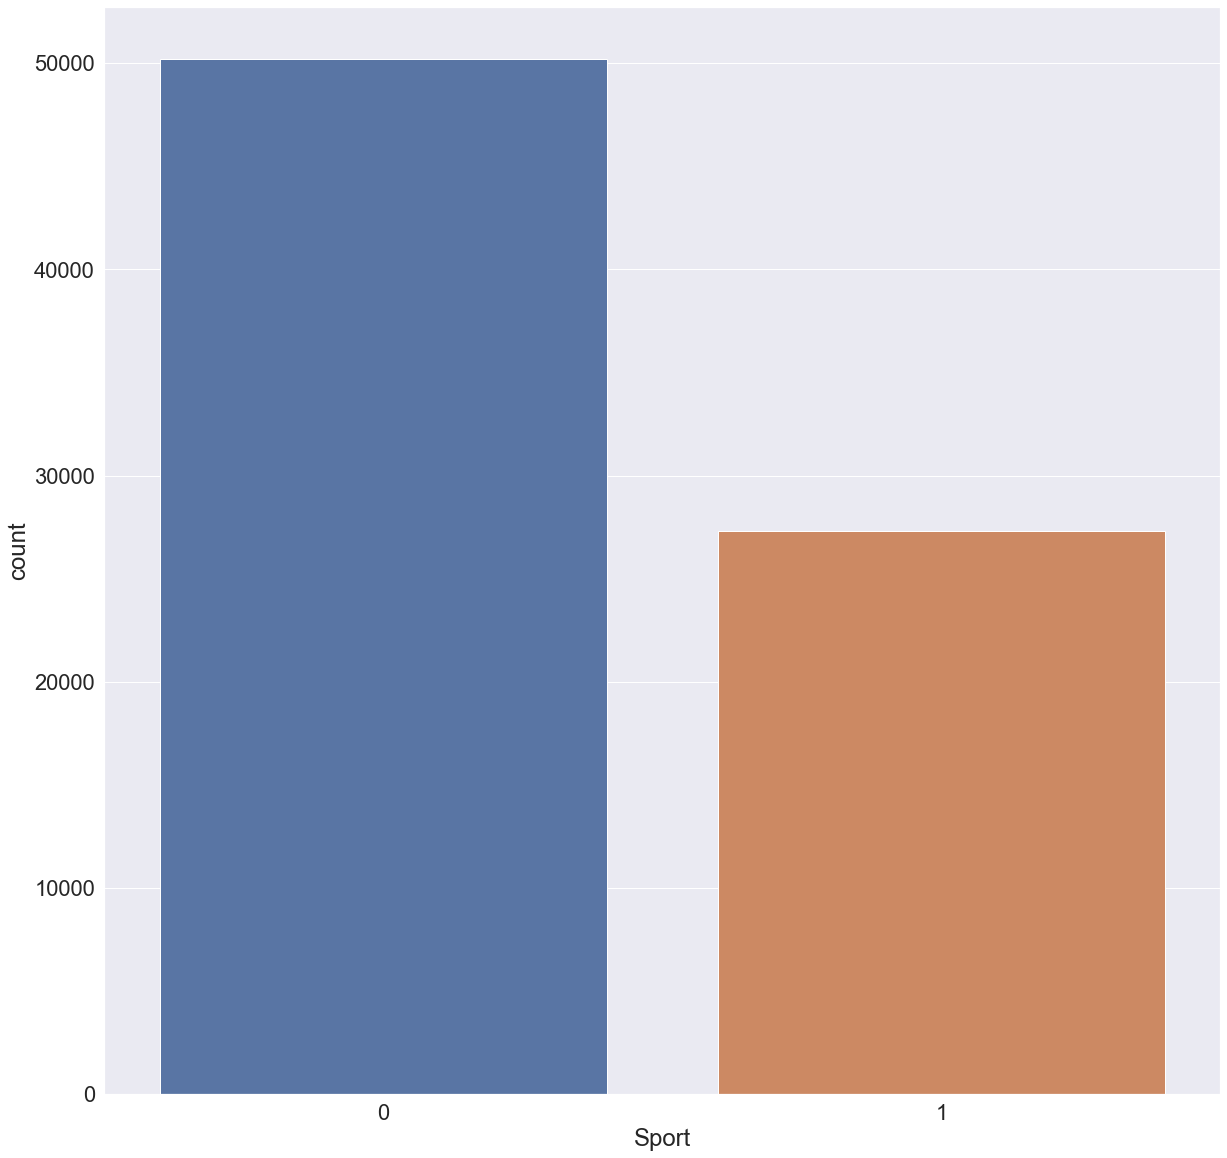

In [82]:
plt.figure(figsize=(20,20))
sns.countplot(df_eda['Sport'])#, 'Trad', 'Boulder', 'TR']])

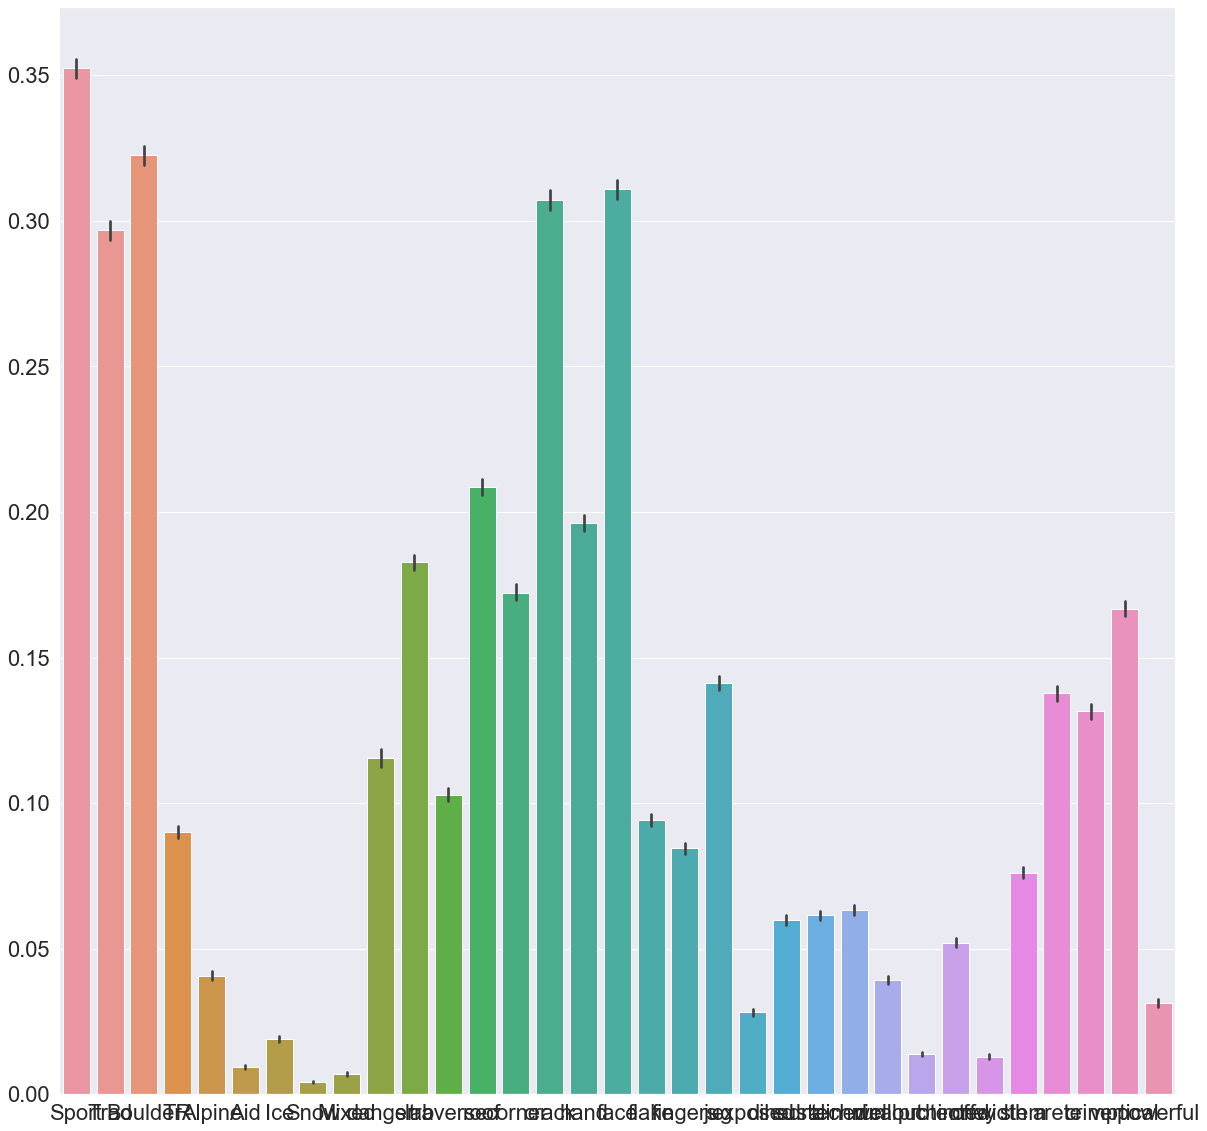

In [83]:
plt.figure(figsize=(20,20))
sns.barplot(data=df_eda)

### Climb Features Distribution

In [84]:
# df_graph = pd.melt(df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']])
df_graph = df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']]

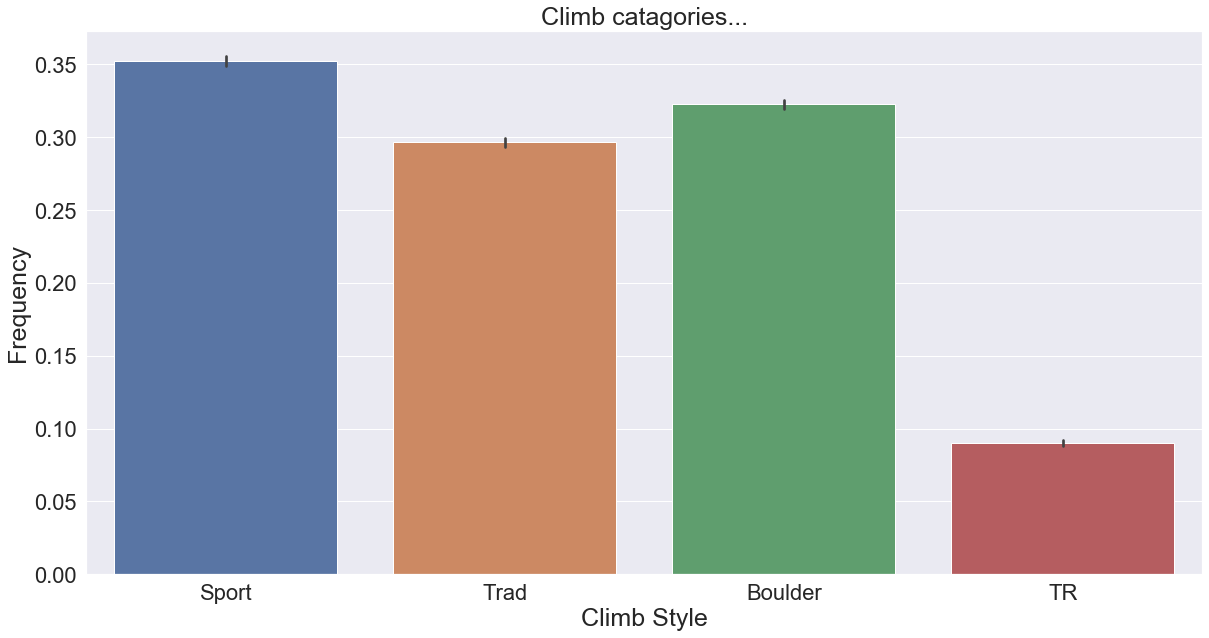

In [85]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df_graph)
plt.title('Climb catagories...',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Frequency',fontsize = 25)
# plt.legend(['No','Yes'])
# plt.set_xlabel(fontsize=20);
plt.savefig('figures/climb_type')

In [86]:
# df_graph = pd.melt(df_eda.loc[:,['Sport', 'Trad', 'Boulder', 'TR']])
df_graph = df_eda.loc[:,col_key_words]

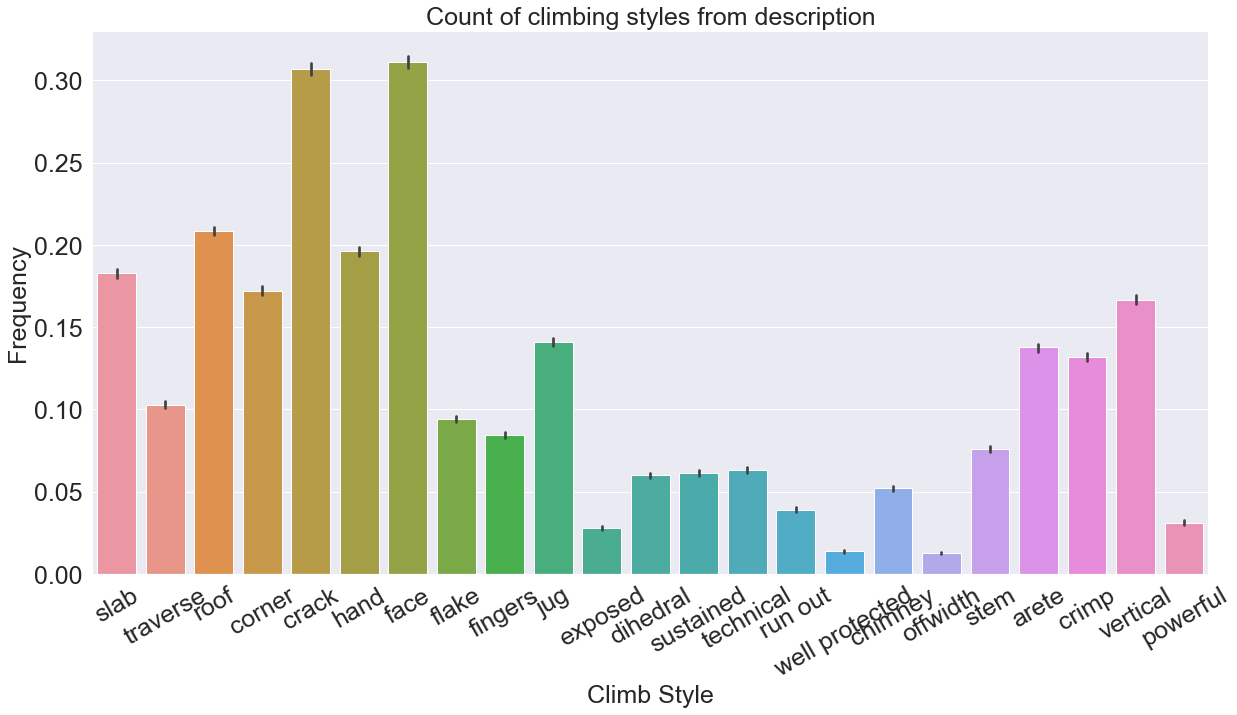

In [87]:
plt.figure(figsize=(20,10))
ax=sns.barplot(data=df_graph)
plt.title('Count of climbing styles from description',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Frequency',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,fontsize = 25)
ax.tick_params(axis="y", labelsize=25)
plt.savefig('figures/climb_style_type.png')

In [88]:
df_graph = pd.melt(df_eda.loc[:,col_key_words])

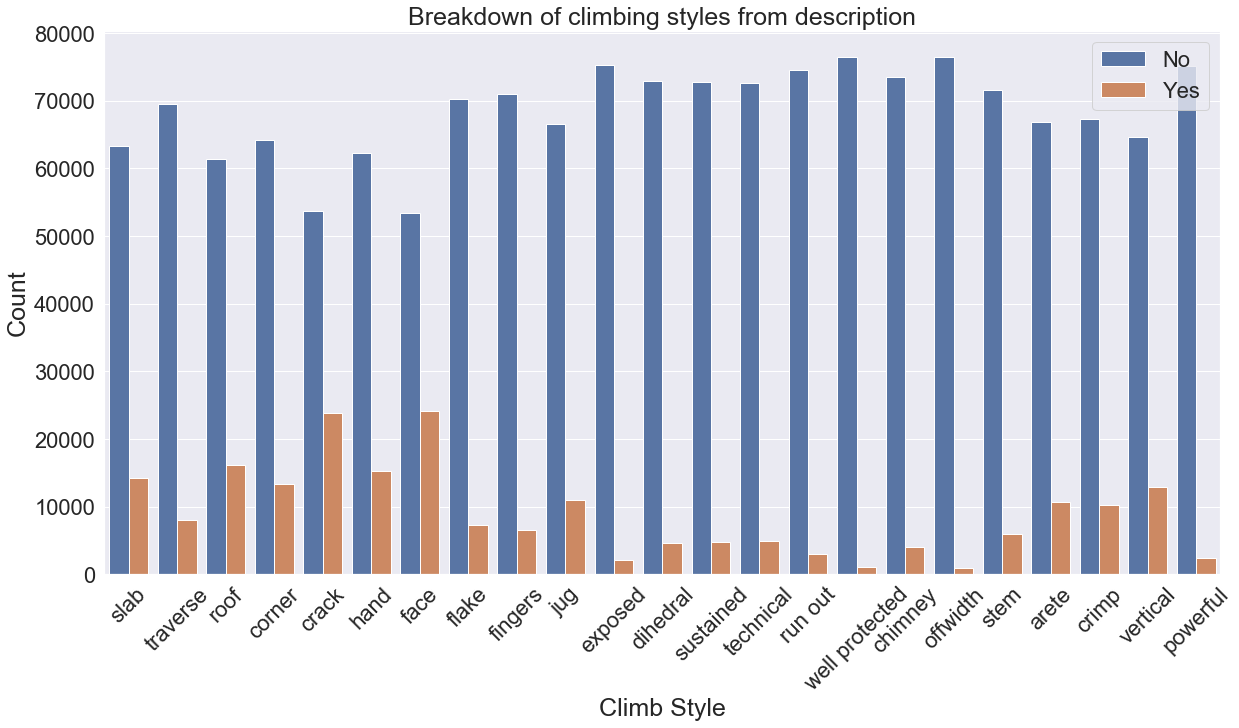

In [89]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="variable", hue="value", data=df_graph)
plt.title('Breakdown of climbing styles from description',fontsize = 25)
plt.xlabel('Climb Style', fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.legend(['No','Yes'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig('figures/climb_description_type')

In [90]:
# sns.factorplot(x='variable', y='value', data=df, kind='bar')

In [91]:
df[df.rating.isna()]

,name,rating,stars,starVotes,pitches,location,region,area,sub_area,wall,longitude,latitude,url,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range,infos,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [92]:
df.describe()

,stars,starVotes,pitches,longitude,latitude,Sport,Trad,Boulder,TR,Alpine,Aid,Ice,Snow,Mixed,danger,rope_grade,boulder_grade,in_range,slab,traverse,roof,corner,crack,hand,face,flake,fingers,jug,exposed,dihedral,sustained,technical,run out,well protected,chimney,offwidth,stem,arete,crimp,vertical,powerful
count,77534.000000,77534.00000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.0,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.00000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000,77534.000000
mean,3.602392,18.56521,0.989979,-98.448375,39.646845,0.352413,0.296683,0.322504,0.089999,0.040679,0.009235,0.018934,0.004153,0.006990,0.115433,16.116891,5.410323,1.0,0.182681,0.102935,0.208425,0.172195,0.307027,0.196185,0.310883,0.09423,0.084427,0.141254,0.028168,0.059922,0.061444,0.063237,0.039118,0.013762,0.052042,0.012872,0.076134,0.137720,0.131594,0.166791,0.031277
std,0.898499,48.56456,1.521234,20.991668,5.473426,0.477725,0.456798,0.467438,0.286182,0.197547,0.095653,0.136292,0.064310,0.083317,0.427700,15.068535,10.007425,0.0,0.386407,0.303877,0.406185,0.377553,0.461263,0.397113,0.462858,0.29215,0.278030,0.348286,0.165454,0.237344,0.240145,0.243390,0.193878,0.116501,0.222113,0.112722,0.265215,0.344608,0.338051,0.372792,0.174065
min,0.000000,0.00000,0.000000,-158.230000,-46.636000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.00000,0.000000,-115.436000,36.919500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,3.00000,1.000000,-106.453000,39.490450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,14.00000,1.000000,-79.540700,43.093200,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,7.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1715.00000,99.000000,150.266000,61.153200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,72.000000,71.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


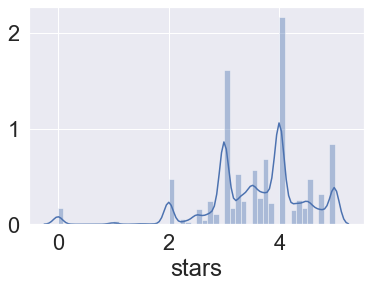

In [93]:
sns.distplot(df['stars'])

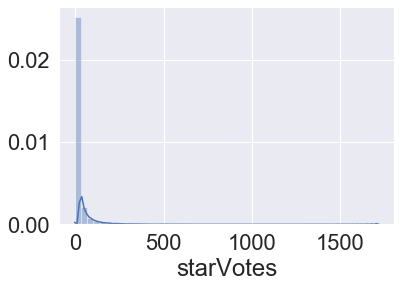

In [94]:
sns.distplot(df['starVotes'])

In [95]:
df['pitches'].value_counts()
# plt.xlim(0, 30)     # set the xlim to left, right

1     46029
0     23720
2      3197
3      1611
4      1001
5       604
6       402
7       243
8       215
10      137
9       109
12       63
11       47
15       35
13       18
14       17
16       12
17        9
18        9
19        8
20        8
22        5
23        5
30        5
21        4
26        3
32        2
25        2
35        2
27        2
33        2
29        2
31        2
99        1
28        1
80        1
36        1
Name: pitches, dtype: int64

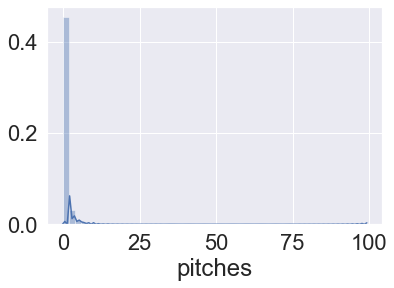

In [96]:
sns.distplot(df['pitches'])

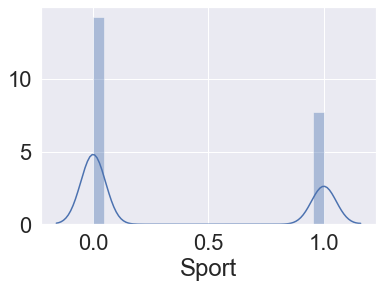

In [97]:
sns.distplot(df['Sport'])

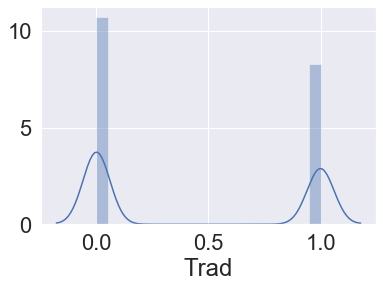

In [98]:
sns.distplot(df.loc[df['Boulder']==0,'Trad'])

In [99]:
df_numeric.loc[(df['Boulder']==0),'name'].count()

NameError: name 'df_numeric' is not defined

In [ ]:
df_numeric.loc[(df['Sport']==1)&(df_numeric['Trad']==1),'name'].count()

In [100]:
df.danger.value_counts()

0    71385
1     3680
2     2137
3      332
Name: danger, dtype: int64

# climb_recommender

## Description
Content based climbing recommendation system. Information about ~36,000 climbs (mostly across North America) 
- User provides
 - Reference climb
 - Zip code, or city & state
 - Search radius
 - Program then displays reference climb details and top 10 matches
 
## Demo
- Video link(coming soon)
 
## Features
- General features include
- Difficulty Grade
 - 3rd class - 5.15d, V-easy - V16, etc.
 - Star rating
 - 1-5 stars
 - Type of climb
 - Sport, Trad, Bouldering, Alpine etc.
 - Pitches (length of the climb)
 
### Feature Engineering
 - Used route description for feature engineering
- NLP, LDA and domain knowledge to get keywords
 - Keywords used as features that describe the route
  - slab 
  - roof
  - crimp
  - crack
  - etc




## EDA 

### This is the general distribution on climbing types
![](figures/climb_type.png)

### This shows the counts for the amount of climbs containing keywords
![](figures/climb_style_type.png)

## Next Steps
- Build system that allows user to ask for match based on features rather than an actual climb
 - User selects
  - Difficulty rating, Sport/Trad, # of pitches
  - Keyword selection:
   - Crimp, crack, overhung, corner, slab etc
- Scrape additional websites for climb descriptions
- Rerun/tweak LDA to add in  topic modeling
- Create a user based recommendation system from mountain projects profiles
